<a href="https://colab.research.google.com/github/AnushreeChopde/DataVizFall2020_Colab/blob/master/Class_Activity_lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anushree Chopde

# Visualize New York Times Database for COVID-19
## Case Study Bristol and Suffolk, MA

## Loading US County Level Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

## loading data into dataframe
df = pd.read_csv(db)

In [4]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
df.describe()

,fips,cases,deaths
count,532540.000000,537714.000000,537714.000000
mean,31123.141024,939.448930,36.442190
std,16249.390281,5996.932273,403.115308
min,1001.000000,0.000000,0.000000
25%,18161.000000,14.000000,0.000000
50%,29183.000000,73.000000,1.000000
75%,46085.000000,354.000000,9.000000
max,78030.000000,255049.000000,23758.000000


## Explore Data

In [6]:
df.nunique()

date        239
county     1923
state        55
fips       3205
cases     16559
deaths     2429
dtype: int64

In [7]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
Bristol_fips = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
print(f'Bristol fips is {Bristol_fips}')

Suffolk_fips = df[(df['county'] == 'Suffolk') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
print(f'Suffolk fips is {Suffolk_fips}')

Bristol fips is 25005
Suffolk fips is 25025


In [8]:
def get_county_stat(df,fips):
  output = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  output.set_index('date',inplace=True)
  output.index = pd.to_datetime(output.index)
  return output

get_county_stat(df,Bristol_fips).head()
#get_county_stat(df,Suffolk_fips).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore Data Type

In [9]:
df_Bristol = get_county_stat(df,25005)
df_Bristol.describe()
df_Suffolk = get_county_stat(df,25025)
df_Suffolk.describe()

,cases,deaths
count,228.000000,228.000000
mean,12976.859649,614.802632
std,9128.734575,463.221758
min,1.000000,0.000000
25%,915.750000,5.000000
50%,17448.500000,838.500000
75%,20628.250000,1036.000000
max,23552.000000,1120.000000


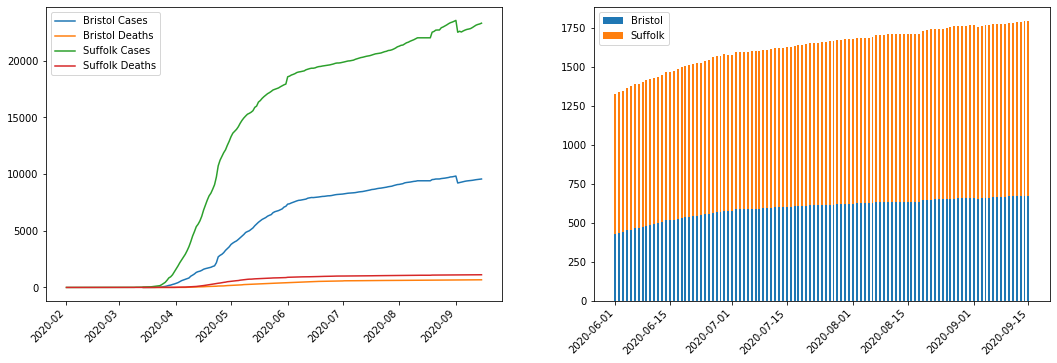

In [10]:
f,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(df_Bristol.index, df_Bristol.cases, label="Bristol Cases")
ax[0].plot(df_Bristol.index, df_Bristol.deaths, label="Bristol Deaths")
ax[0].plot(df_Suffolk.index, df_Suffolk.cases, label="Suffolk Cases")
ax[0].plot(df_Suffolk.index, df_Suffolk.deaths, label="Suffolk Deaths")
ax[0].legend()
f.autofmt_xdate(rotation=45)
f.savefig('covid-19.svg')

df_Bristol_deaths = df_Bristol.loc[lambda df:df.index >= '2020-06-01',['deaths']]
df_Suffolk_deaths = df_Suffolk.loc[lambda df:df.index >= '2020-06-01',['deaths']]

width = 0.5       # the width of the bars: can also be len(x) sequence

ax[1].bar(df_Bristol_deaths.index, df_Bristol_deaths.deaths, width, label='Bristol')
ax[1].bar(df_Suffolk_deaths.index, df_Suffolk_deaths.deaths, width, bottom=df_Bristol_deaths.deaths, label='Suffolk')
ax[1].legend()
f.autofmt_xdate(rotation=45)


## Top 10 counties by number of cases and deaths

In [11]:
top_ten_cases = df.groupby('county').max().sort_values(by='cases', ascending=False)[:10]
pd.set_option('display.max_column', None)
print(top_ten_cases)

                     date       state     fips   cases  deaths
county                                                        
Los Angeles    2020-09-15  California   6037.0  255049    6273
New York City  2020-09-15    New York      NaN  243061   23758
Miami-Dade     2020-09-15     Florida  12086.0  164687    2923
Maricopa       2020-09-15     Arizona   4013.0  137870    3172
Cook           2020-09-15   Minnesota  27031.0  135690    5137
Harris         2020-09-15       Texas  48201.0  120336    2440
Dallas         2020-09-15       Texas  48113.0   79474    1050
Broward        2020-09-15     Florida  12011.0   74689    1288
Clark          2020-09-15   Wisconsin  55019.0   62952    1287
Riverside      2020-09-15  California   6065.0   55986    1125


In [12]:
top_ten_deaths = df.groupby('county').max().sort_values(by='deaths', ascending=False)[:10]
pd.set_option('display.max_column', None)
print(top_ten_deaths)

                     date          state     fips   cases  deaths
county                                                           
New York City  2020-09-15       New York      NaN  243061   23758
Los Angeles    2020-09-15     California   6037.0  255049    6273
Cook           2020-09-15      Minnesota  27031.0  135690    5137
Maricopa       2020-09-15        Arizona   4013.0  137870    3172
Wayne          2020-09-15  West Virginia  54099.0   33678    2948
Miami-Dade     2020-09-15        Florida  12086.0  164687    2923
Nassau         2020-09-15       New York  36059.0   45840    2706
Harris         2020-09-15          Texas  48201.0  120336    2440
Essex          2020-09-15       Virginia  51057.0   20931    2123
Middlesex      2020-09-15       Virginia  51119.0   27732    2109


In [85]:
## Week 3 (Monday)

df.groupby('fips').last().sort_values(by='cases', ascending=False).head(10)

#grp = df.groupby('fips')#['date'].last().unique()#.last()#.sort_values(by='cases',ascending=False ).head(10)

,date,county,state,cases,deaths
fips,,,,,
6037.0,2020-09-15,Los Angeles,California,255049,6273
12086.0,2020-09-15,Miami-Dade,Florida,164687,2923
4013.0,2020-09-15,Maricopa,Arizona,137870,3172
17031.0,2020-09-15,Cook,Illinois,135690,5137
48201.0,2020-09-15,Harris,Texas,120336,2440
48113.0,2020-09-15,Dallas,Texas,79474,1050
12011.0,2020-09-15,Broward,Florida,74689,1288
32003.0,2020-09-15,Clark,Nevada,62952,1287
6065.0,2020-09-15,Riverside,California,55986,1125


In [26]:
df.dtypes
df['date'] = pd.to_datetime(df['date'])
df[df['date'] == '2020-09-15'].sort_values(by='cases', ascending=False).head(10)

,date,county,state,fips,cases,deaths
534681,2020-09-15,Los Angeles,California,6037.0,255049,6273
536343,2020-09-15,New York City,New York,NaN,243061,23758
534840,2020-09-15,Miami-Dade,Florida,12086.0,164687,2923
534579,2020-09-15,Maricopa,Arizona,4013.0,137870,3172
535090,2020-09-15,Cook,Illinois,17031.0,135690,5137
537190,2020-09-15,Harris,Texas,48201.0,120336,2440
537146,2020-09-15,Dallas,Texas,48113.0,79474,1050
534803,2020-09-15,Broward,Florida,12011.0,74689,1288
536234,2020-09-15,Clark,Nevada,32003.0,62952,1287
534695,2020-09-15,Riverside,California,6065.0,55986,1125


In [37]:
df.groupby('fips').last().sort_values(by='deaths', ascending=False).head(10)

,date,county,state,cases,deaths
fips,,,,,
6037.0,2020-09-15,Los Angeles,California,255049,6273
17031.0,2020-09-15,Cook,Illinois,135690,5137
4013.0,2020-09-15,Maricopa,Arizona,137870,3172
26163.0,2020-09-15,Wayne,Michigan,33678,2948
12086.0,2020-09-15,Miami-Dade,Florida,164687,2923
48201.0,2020-09-15,Harris,Texas,120336,2440
36059.0,2020-09-15,Nassau,New York,45840,2201
34013.0,2020-09-15,Essex,New Jersey,20931,2122
25017.0,2020-09-15,Middlesex,Massachusetts,26304,2109


In [38]:
df.dtypes
df['date'] = pd.to_datetime(df['date'])
df[df['date'] == '2020-09-15'].sort_values(by='deaths', ascending=False).head(10)

,date,county,state,fips,cases,deaths
536343,2020-09-15,New York City,New York,NaN,243061,23758
534681,2020-09-15,Los Angeles,California,6037.0,255049,6273
535090,2020-09-15,Cook,Illinois,17031.0,135690,5137
534579,2020-09-15,Maricopa,Arizona,4013.0,137870,3172
535798,2020-09-15,Wayne,Michigan,26163.0,33678,2948
534840,2020-09-15,Miami-Dade,Florida,12086.0,164687,2923
537190,2020-09-15,Harris,Texas,48201.0,120336,2440
536342,2020-09-15,Nassau,New York,36059.0,45840,2201
536265,2020-09-15,Essex,New Jersey,34013.0,20931,2122
535709,2020-09-15,Middlesex,Massachusetts,25017.0,26304,2109


In [79]:
NY_cases = df['cases']
NY_cases = df[(df['state'] == 'New York')]['cases'].count()
NY_cases.sum()


10602

### Death rate per FIPS

In [80]:
data_per_fips = df.loc[lambda df: df['date'] == df['date'].max(), ['county', 'state', 'fips', 'cases', 'deaths']]
data_per_fips_countywise = data_per_fips.set_index('county')
cases = data_per_fips_countywise['cases']
deaths = data_per_fips_countywise['deaths']

In [81]:
death_rate_per_fips = (deaths / cases) * 100
death_rate_per_fips

county
Autauga       1.499063
Baldwin       0.941506
Barbour       0.868486
Bibb          1.472995
Blount        0.881356
                ...   
Sweetwater    0.630915
Teton         0.209205
Uinta         0.641026
Washakie      5.454545
Weston        0.000000
Length: 3236, dtype: float64

## Bonus Point
## A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate
### ALL COUNTIES


#### def Folium_Choropleth(type = 'cases',date=''):


In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

#df_daily = df.diff().fillna(0)
#df_daily.tail(10)



In [ ]:
#df_rolling_avg = df_daily.iloc[-14:].rolling(window=7).mean().fillna(0)

#def Folium_Choropleth(type = 'cases', date=' '):
